Взято https://blog.quantinsti.com/trading-using-machine-learning-python/

In [1]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df= yf.download('GLD',start= '2010-01-01', end='2021-08-26')
df=df[['Open','High','Low','Close']]
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

df=df[['open','high','low','close']]

[*********************100%***********************]  1 of 1 completed


<ipython-input-2-bd88dac8c6fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open']=df['Open'].shift(1)


In [3]:
df=df.dropna()

In [4]:
unsup = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=42)

In [5]:
unsup.fit(np.reshape(df,(-1,df.shape[1])))
regime = unsup.predict(np.reshape(df,(-1,df.shape[1])))

In [6]:
df['Return']= np.log(df['close']/df['close'].shift(1))

In [7]:
Regimes=pd.DataFrame(regime,columns=['Regime'],index=df.index)\
                     .join(df, how='inner')\
                          .assign(market_cu_return=df.Return.cumsum())\
                                 .reset_index(drop=False)\
                                             .rename(columns={'index':'Date'})

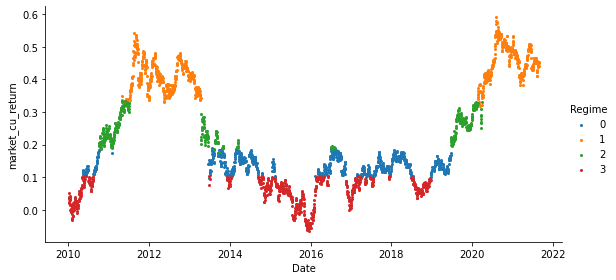

In [8]:
order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,height= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

In [93]:
for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variance for regime %i: '%i,(unsup.covariances_[i]))

Mean for regime 0:  0.03627888440127021
Co-Variance for regime 0:  4.272972082699293e-06
Mean for regime 1:  0.06780463262842908
Co-Variance for regime 1:  1.988749096060874e-05
Mean for regime 2:  0.04931326776371522
Co-Variance for regime 2:  7.961496136019736e-06
Mean for regime 3:  0.04216136607491339
Co-Variance for regime 3:  3.364350581519252e-06


In [94]:
Regimes.head(50)

,Date,Regime,open,high,low,close,Return,market_cu_return
0,2016-01-05,1,0.07951,0.07951,0.07702,0.07719,NaN,NaN
1,2016-01-06,1,0.07680,0.07819,0.07500,0.07532,-0.024524,-2.452420e-02
2,2016-01-11,1,0.07550,0.07550,0.07400,0.07517,-0.001993,-2.651762e-02
3,2016-01-12,1,0.07380,0.07390,0.07200,0.07225,-0.039620,-6.613753e-02
4,2016-01-13,1,0.07163,0.07443,0.07061,0.07362,0.018784,-4.735316e-02
5,2016-01-14,1,0.07425,0.07465,0.07210,0.07225,-0.018784,-6.613753e-02
6,2016-01-15,1,0.07100,0.07300,0.07100,0.07186,-0.005413,-7.155009e-02
7,2016-01-18,1,0.07139,0.07215,0.06900,0.06950,-0.033393,-1.049431e-01
8,2016-01-19,1,0.06937,0.06997,0.06779,0.06940,-0.001440,-1.063830e-01
9,2016-01-20,1,0.07045,0.07120,0.06822,0.06940,0.000000,-1.063830e-01
